## Phys 342 Lab 9

This lab applies the least squares method to estimate parameters that are not linear model coefficients. As a result the goodness of fit test using the value of minimum $\chi^2$ is not exact.

Model: $E[V_i] = \alpha t_i \cos(\beta t_i)$

$V_i$ are gaussian distributed with standard deviation $\sigma_i$. The data is generated using random numbers with a defined seed, so the results are reproducable, if the entire notebook is rerun (Kernel -> restart & run all)

Some cells are missing code that needs to be added to complete the lab.

In [22]:
# cell #1: generic setup
import numpy as np
from scipy import stats, optimize
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
# cell #2: define basic parameters, the model, and create a reference dataset 

#set the seed for random number generation, so the results are reproducable
np.random.seed(seed=123456)

# define the parameters of the problem
n = 8 # number of data points
trange = [0.,4.] # range within t_i values are drawn
srange = [0.2,1.0] # corresponding range of sigma_i values
a_true = 1.5 # true value for the parameter a
b_true = 2.0 # true value for the parameter b

# Our model:
def model(a,b,t):
    return a*t*np.cos(b*t)

def get_data():
    dt = (trange[1]-trange[0])/n # distance between t values
    t = np.arange(trange[0]+dt,trange[1]+0.001,dt) # 0.001 added to ensure exactly n points in arange
    sigma = (t-trange[0])/(trange[1]-trange[0])*(srange[1]-srange[0]) + srange[0]
    v = model(a_true,b_true,t) + stats.norm.rvs(scale=sigma)
    return t, v, sigma

# Reference data:
t, v, sigma = get_data()

In [24]:
# cell #3: calculate chi^2 for particular choice of parameter values

# input: args: [a,b]

def chi2(args):
    a = args[0]
    b = args[1]
    value = np.sum((v - model(a,b,t))**2/sigma**2)
    return value

ass_test = chi2([a_true,b_true])
print("With test with the assumed true values, chi2 = %.2f as expected." %(ass_test))

With test with the assumed true values, chi2 = 6.47 as expected.


In [25]:
# cell #4: find best estimates for parameters using least squares for the reference dataset

# start with a guess and find the parameters that minimize the chi2 function
guess = [1.3,1.3]
# the optimize.minimize method calls the chi2 function several times to find
# parameters that produce the minimum value of that function 
# it starts from the parameters stored in guess
result = optimize.minimize(chi2,guess)
a_est = result.x[0]; b_est = result.x[1]

# the one standard deviation uncertainties are estimated by the second derivatives of the function
# since we are using chi2 instead of log-likelihood, factors of 2 needs to be included
sig_a = np.sqrt(result.hess_inv[0,0]*2.)
sig_b = np.sqrt(result.hess_inv[1,1]*2.)
rho = result.hess_inv[0,1]*2./sig_a/sig_b

print("Parameter estimates:")
print("  a-hat = %5.2f +/- %5.2f" %(result.x[0],sig_a))
print("  b-hat = %5.2f +/- %5.2f" %(result.x[1],sig_b))
print("Correlation coeff = %5.2f" %(rho))

print("chi^2 min = %5.2f" %(chi2([a_est,b_est])))
print("chi^2 true = %5.2f" %(chi2([a_true,b_true])))

Parameter estimates:
  a-hat =  1.75 +/-  0.16
  b-hat =  2.03 +/-  0.03
Correlation coeff = -0.01
chi^2 min =  3.13
chi^2 true =  6.47


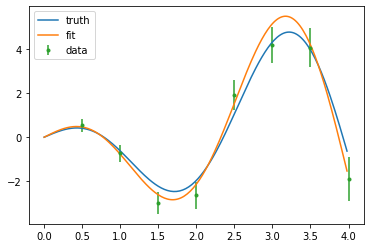

In [26]:
# cell #5: compare visually the data and the model

fig, axes = plt.subplots()
tarray = np.arange(trange[0],trange[1],0.02)
varray = model(a_true,b_true,tarray)
vfit = model(a_est,b_est,tarray)
axes.plot(tarray,varray,label="truth")
axes.plot(tarray,vfit,label="fit")
axes.errorbar(t,v,yerr=sigma,marker='.',linestyle='none',label='data')
plt.legend();

In [27]:
#Cell #6
pull_a = []
pull_b = []
for i in range(1000):
    v, t, sigma = get_data()
    
    guess = [1.3,1.3]
    result = optimize.minimize(chi2,guess)
    a_est = result.x[0]; b_est = result.x[1]

    sig_a = np.sqrt(result.hess_inv[0,0]*2.)
    sig_b = np.sqrt(result.hess_inv[1,1]*2.)
    rho = result.hess_inv[0,1]*2./sig_a/sig_b

    pull_a.append((a_est - a_true)/sig_a)
    pull_b.append((b_est - b_true)/sig_b)

n=50
for i in pull_a:
    if abs(i)>n:
        print(i)
print(" ")
for i in pull_b:
    if abs(i)>n:
        print(i)

 
74.90300200558535
-54.749015926446845
-66.60709152274165
90.41033760861502
-70.66267044515172
-97.19232016519096
68.66007337419384
-179.3560516006303
351.734318474355
-50.49583371017559
-50.170843402785174
78.97064611851086
76.53134935742948


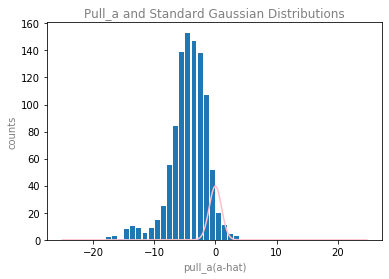

-4.370451972404176


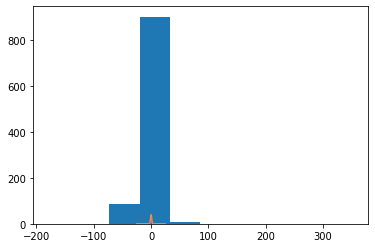

In [28]:
#make standard Gaussian pdf:
mean = 0; standardDeviation = 1; dxMax = 25#max(pull_a) #maybe 25 instead? bc there are weird outliers
x = np.arange(mean-dxMax,mean+dxMax,dxMax/100)
g_pdf = stats.norm.pdf(x,loc=mean,scale=standardDeviation)*100

#scaling factor means that y=pdf*numpoints*binwidth

#plot pull_a dist and standard gaussian:    
plt.hist(pull_a,bins=np.arange(-25,25,1), rwidth=.8) #alternatively: np.arange(min(pull_a), max(pull_a),1) but tthis takes a long time
plt.plot(x, g_pdf, color="pink")
plt.title("Pull_a and Standard Gaussian Distributions", color="grey")
plt.xlabel("pull_a(a-hat)", color="grey")
plt.ylabel("counts", color="grey")
plt.show()

#pull_a mean
mean = np.sum(pull_a)/len(pull_a)
print(mean)

#plot pull_b dist and standard gaussian
plt.hist(pull_b,)
plt.plot(x,g_pdf, color='coral')
plt.show()
